## Práctica 1

## Práctica 1
Acá abajo escribimos las funciones que vamos a necesitar para resolver numéricamente los ejercicios.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def esquema_midpoint(X, u, t, dt):
  """
  Calcula X(t+dt) a partir de X(t) y el campo de velocidades.

  Parámetros:
    X : Solución a tiempo t (X(t)) cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    t : Tiempo donde se conoce t
    dt: Paso temporal
  """
  return X + (dt/2)*(u(X,t)+u(X+dt*u(X,t),t+dt)) #Runge Kutta a orden 2

def paso_RK(X, u, t, dt):
    """
    Calcula X(t+dt) a partir de X(t) y el campo de velocidades.

    Parámetros:
    X : Solución a tiempo t (X(t)) cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    t : Tiempo donde se conoce t
    dt: Paso temporal
    """
    k1 = u(X,t)
    k2 = u(X+k1*dt/2,t)
    k3 = u(X+k2*dt/2,t)
    k4 = u(X+k3*dt,t)
    X = X + (k1 + 2*(k2+k3) + k4)/6*dt
    #t = t + dt
    return X #Runge Kutta a orden 4


In [47]:
def trayectoria(X0, u, N, dt):
    """
    Calcula numéricamente la solución a dX/ds = u(X,t) cómo
    un arreglo, usando el esquema definido previamente

    Parámetros:
    X0: Condición inicial cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    N : Número de pasos temporales
    dt: Paso temporal
    """
    d = X0.shape[0]            # Dimensión del problema
    ts = np.arange(0, N+1)*dt  # Tiempos donde calcularé la solución
    Xs = np.zeros((N+1, d))    # Solución aproximada
    Xs[0] = X0                 # Impongo la condición inicial a t=0
    for j in range(N):
    # Aplico esquema anterior sobre Xs[j] para obtener Xs[j+1]
        #Xs[j+1] = esquema_midpoint(Xs[j], u, ts[j], dt)
        Xs[j+1] = paso_RK(Xs[j], u, ts[j], dt)
        
    return ts, Xs

def linea_de_corriente(l0, u, t, N, ds):
    """
    Calcula numéricamente la solución a dX/ds = u(X,t) cómo
    un arreglo, usando el esquema definido previamente

    Parámetros:
    l0: Origen de la línea cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    t : Tiempo para el cual se está calculando la línea
    N : Número de pasos en s
    ds: Paso del parametrizador
    """
    d = l0.shape[0]            # Dimensión del problema
    s = np.arange(0, N+1)*ds   # Valores del parametrizador s
    ls = np.zeros((N+1, d))    # Solución aproximada a lo largo de s
    ls[0] = l0                 # Impongo la condición inicial a s=0
    for j in range(N):
    # Aplico esquema sobre ls[j] para obtener ls[j+1]
        #ls[j+1] = esquema_midpoint(ls[j], u, t, ds)
        ls[j+1] = paso_RK(ls[j], u, t, ds)
    return s, ls



In [54]:
#defino un par de funciones utiles

def p0_(r,th):
    x = r*np.cos(th)
    y = r*np.sin(th)
    return [x,y]

def cart_to_polar(x,y):
    r = np.sqrt(x**2+y**2)
    th = np.arctan(y/x)
    return r,th

def polar_to_cart(r,th):
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y

def cart2polar(x,y):
    r = np.sqrt(x**2 + y**2)
    if x>0:
        th = np.arctan(y/x)
    elif x<0:
        th = np.arctan(y/x) + np.pi
    elif x == 0 and y > 0:
        th = np.pi/2
    elif x==0 and y<0:
        th = -np.pi/2
    return r,th



### Ejercicio 3
#### (iv) $ u(r,\theta) = \frac{-Q}{2 \pi r} \hat{r} + \frac{\Gamma}{2 \pi r} \hat{\theta}$
Adimensionalizamos:
$r' \rightarrow  \frac{R}{r}$
$ \Rightarrow u(r,\theta) = \frac{-QR}{2 \pi r} \hat{r} + \frac{\Gamma R}{2 \pi r} \hat{\theta} = \frac{-Q}{2 \pi r'} \hat{r} + \frac{\Gamma}{2 \pi r'} \hat{\theta}$



Text(0.5, 1.0, 'Líneas de corriente | d$s=0.0001$')

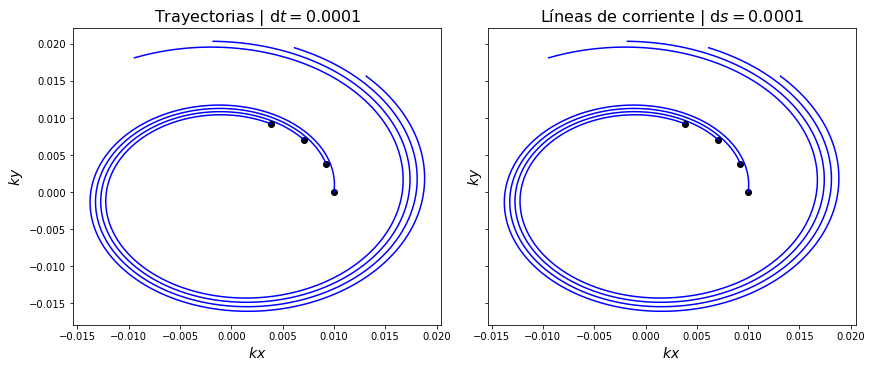

In [62]:
def u_4(X,t):
    #llegan coordenadas cartesianas y las convierto a polares
    r, th = cart_to_polar(X[0],X[1])
    r,th = cart2polar(X[0],X[1])
    Q=0.01
    gamma=0.1
    
    #funcion de velocidad en coordenadas polares
    u_r = Q/(2*np.pi*r)
    u_th = gamma/(2*np.pi*r)
    
    #cambio de base de coordenadas polares a cartesianas
    u_x = u_r*np.cos(th) - u_th*np.sin(th)
    u_y = u_r*np.sin(th) + u_th*np.cos(th)
    return np.array([u_x,u_y])
    
N = 1000
dt = 1e-4
r0 = 0.01
p0s = np.array([p0_(r0,0), p0_(r0,np.pi/8), p0_(r0,np.pi/4), p0_(r0,np.pi*3/8)])

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                               sharex=True, sharey=True)
for i in range(4):
    _, Xs = trayectoria(p0s[i], u_4, N, dt)
    ax1.plot(Xs[0,0], Xs[0,1], "ko")
    ax1.plot(Xs[:,0], Xs[:,1], "b-")

N = 1000
ds = 1e-4
for i in range(4):
    _, ls = linea_de_corriente(p0s[i], u_4, 0, N, ds)
    ax2.plot(ls[0,0], ls[0,1], "ko")
    ax2.plot(ls[:,0], ls[:,1], "b-")

#ax1.set_xlim(-4,4)
#ax1.set_ylim(-4,4)
ax1.set_xlabel('$kx$', fontsize=14)
ax1.set_ylabel('$ky$', fontsize=14)
ax1.set_title(f'Trayectorias | d$t={dt}$', fontsize=16)
ax2.set_xlabel('$kx$', fontsize=14)
ax2.set_ylabel('$ky$', fontsize=14)
ax2.set_title(f'Líneas de corriente | d$s={ds}$', fontsize=16)

### (v)  $ u(r,\theta) = \frac{Q}{2 \pi r} + u cos(\theta) \hat{r} - u sin(\theta) \hat{\theta} = \frac{Q}{2 \pi r} cos(\theta) + u \hat{x} + \frac{Q}{2 \pi r} sin(\theta) \hat{y}$



Text(0.5, 1.0, 'Líneas de corriente | d$s=0.001$')

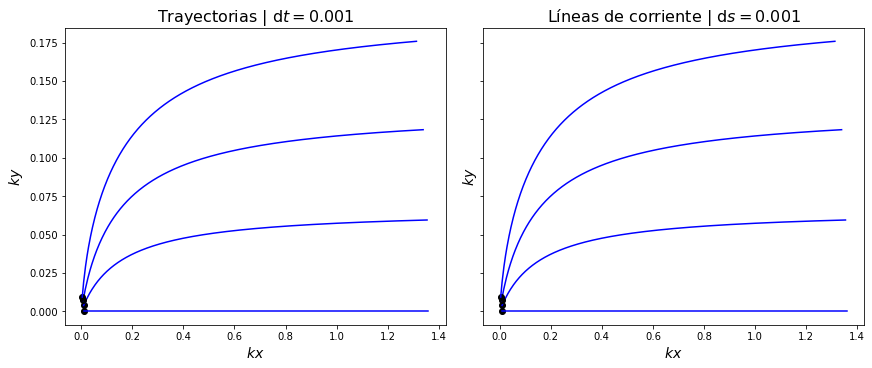

In [65]:
def u_5(X,t):
    #llegan coordenadas cartesianas y las convierto a polares
    r, th = cart_to_polar(X[0],X[1])
    u0=1
    Q = 1
    #funcion de velocidad en coordenadas cartesianas
    u_r = Q/(2*np.pi*r) + u0*np.cos(th)
    u_th = -u0*np.sin(th)
    
    #cambio de base de coordenadas polares a cartesianas
    u_x = u_r*np.cos(th) - u_th*np.sin(th)
    u_y = u_r*np.sin(th) + u_th*np.cos(th)
    return np.array([u_x,u_y])

    
N = 1000
dt = 1e-3
r0 = 0.01
p0s = np.array([p0_(r0,0), p0_(r0,np.pi/8), p0_(r0,np.pi/4), p0_(r0,np.pi*3/8)]) #condiciones iniciales en ciruclo

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                               sharex=True, sharey=True)
for i in range(4):
    _, Xs = trayectoria(p0s[i], u_5, N, dt)
    ax1.plot(Xs[0,0], Xs[0,1], "ko")
    ax1.plot(Xs[:,0], Xs[:,1], "b-")

N = 1000
ds = 1e-3
for i in range(4):
    _, ls = linea_de_corriente(p0s[i], u_5, 0, N, ds)
    ax2.plot(ls[0,0], ls[0,1], "ko")
    ax2.plot(ls[:,0], ls[:,1], "b-")

#ax1.set_xlim(-4,4)
#ax1.set_ylim(-4,4)
ax1.set_xlabel('$kx$', fontsize=14)
ax1.set_ylabel('$ky$', fontsize=14)
ax1.set_title(f'Trayectorias | d$t={dt}$', fontsize=16)
ax2.set_xlabel('$kx$', fontsize=14)
ax2.set_ylabel('$ky$', fontsize=14)
ax2.set_title(f'Líneas de corriente | d$s={ds}$', fontsize=16)